# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint as pprint
import csv
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1200)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1200)
lat_lngs = zip(lats, lngs)


In [3]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

524

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
# units = "metric"
units ="Imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=f6d186f5be61a18e5c72185e738ff21e&units=Imperial&q='

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
# units = "metric"
units ="Imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

search=[]
city_list=[]
country_list=[]


lat_data=[]
lng_data=[]
temp_data=[]
humidity_data=[]
cloundiness_data=[]
wind_data=[]


row_count =0

for city in cities: 
    try:
        print(f"Record {row_count} -City:{city}")
        row_count+=1
        response= requests.get(query_url + city).json()
        country_name= response['sys']['country']
        city_id=response['id']
              
        search.append(response)
        city_list.append(city)
        country_list.append(country_name)
        
        lat_name=response['coord']['lat']
        lat_data.append(lat_name)
        
        lng_name=response['coord']['lon']
        lng_data.append(lng_name)
        
        temp_status=response['main']['temp']
        temp_data.append(temp_status)
        
        humidity_status=response['main']['humidity']
        humidity_data.append(humidity_status)
        
        cloundiness_status=response['clouds']['all']
        cloundiness_data.append(cloundiness_status)
        
        wind_status=response['wind']['speed']
        wind_data.append(wind_status)
                
    except Exception as ex:
        print(f"Skip! The City: {city} is not found")
        pass
    
    if row_count % 50 == 0:
        time.sleep(30)
    
print("Processing complete!")        


Record 0 -City:coihaique
Record 1 -City:rikitea
Record 2 -City:pevek
Record 3 -City:cidreira
Record 4 -City:maragogi
Record 5 -City:tasiilaq
Record 6 -City:nizhnyaya omka
Record 7 -City:mahajanga
Record 8 -City:taolanaro
Skip! The City: taolanaro is not found
Record 9 -City:tutoia
Record 10 -City:mataura
Record 11 -City:aracoiaba
Record 12 -City:kaitangata
Record 13 -City:butaritari
Record 14 -City:belushya guba
Skip! The City: belushya guba is not found
Record 15 -City:los llanos de aridane
Record 16 -City:cape town
Record 17 -City:bambous virieux
Record 18 -City:wertheim
Record 19 -City:freital
Record 20 -City:hermanus
Record 21 -City:vaitupu
Skip! The City: vaitupu is not found
Record 22 -City:mar del plata
Record 23 -City:tuktoyaktuk
Record 24 -City:vaini
Record 25 -City:taltal
Record 26 -City:plouzane
Record 27 -City:alamos
Record 28 -City:ushuaia
Record 29 -City:asau
Skip! The City: asau is not found
Record 30 -City:jamestown
Record 31 -City:comodoro rivadavia
Record 32 -City:att

Record 276 -City:gazojak
Record 277 -City:salisbury
Record 278 -City:marcona
Skip! The City: marcona is not found
Record 279 -City:fortuna foothills
Record 280 -City:kununurra
Record 281 -City:carolina
Record 282 -City:dubbo
Record 283 -City:leningradskiy
Record 284 -City:kitimat
Record 285 -City:alice springs
Record 286 -City:port macquarie
Record 287 -City:toliary
Skip! The City: toliary is not found
Record 288 -City:gorkovskoye
Skip! The City: gorkovskoye is not found
Record 289 -City:panguna
Record 290 -City:ossora
Record 291 -City:castro
Record 292 -City:kibala
Record 293 -City:calabozo
Record 294 -City:karasjok
Record 295 -City:tiksi
Record 296 -City:mrirt
Skip! The City: mrirt is not found
Record 297 -City:sungaipenuh
Record 298 -City:kavieng
Record 299 -City:esil
Record 300 -City:innisfail
Record 301 -City:grand gaube
Record 302 -City:skagastrond
Skip! The City: skagastrond is not found
Record 303 -City:pangody
Record 304 -City:vangaindrano
Record 305 -City:tostamaa
Skip! The C

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_data=pd.DataFrame({"City": city_list,
                          "Country": country_list,
                          "Latitude":lat_data,
                          "Longitude": lng_data,
                          "Temperature (F)": temp_data,
                          "Humidity %": humidity_data,
                          "Cloundiness %":cloundiness_data, 
                          "Wind Speed (mph)": wind_data})
weather_data.head()


,City,Country,Latitude,Longitude,Temperature (F),Humidity %,Cloundiness %,Wind Speed (mph)
0,coihaique,CL,-45.58,-72.07,30.20,92,90,0.72
1,rikitea,PF,-23.12,-134.97,67.19,71,90,24.70
2,pevek,RU,69.70,170.27,34.61,94,73,5.66
3,cidreira,BR,-30.17,-50.22,45.59,71,0,10.31
4,maragogi,BR,-9.01,-35.22,69.89,95,0,1.57


In [7]:
#export the city data into a CSV
weather_data.to_csv("weather_data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

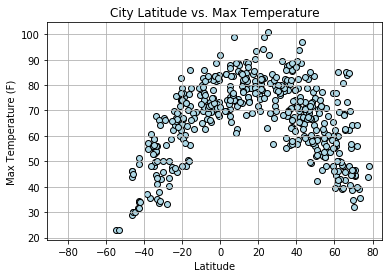

In [8]:
plt.scatter(weather_data["Latitude"], weather_data["Temperature (F)"], marker="o", facecolor="lightblue", edgecolor="black")

plt.xlim(-90.90)
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

#Save Figure
plt.savefig("Latitude_vs_Temperature.png")

plt.show()

#### Latitude vs. Humidity Plot

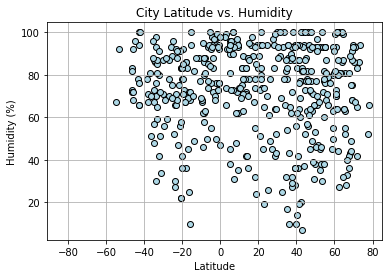

In [9]:
plt.scatter(weather_data["Latitude"], weather_data["Humidity %"], marker="o", facecolor="lightblue", edgecolor="black")

plt.xlim(-90.90)
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

#Save Figure
plt.savefig("Latitude_vs_Humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

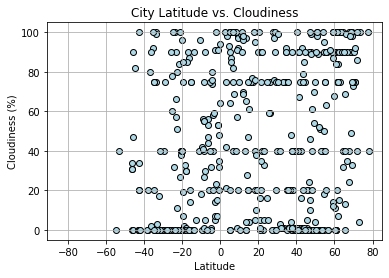

In [10]:
plt.scatter(weather_data["Latitude"], weather_data["Cloundiness %"], marker="o", facecolor="lightblue", edgecolor="black")

plt.xlim(-90.90)
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

#Save Figure
plt.savefig("Latitude_vs_Cloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

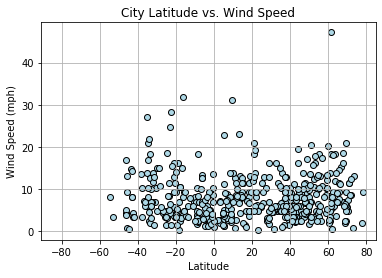

In [11]:
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed (mph)"], marker="o", facecolor="lightblue", edgecolor="black")

plt.xlim(-90.90)
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

#Save Figure
plt.savefig("Latitude_vs_Speed.png")

plt.show()